<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Gradiant_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.metrics import accuracy_score

In [5]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# define feature and target variable
X = df[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [10]:
# train test split and model creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# model creation
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=1)
model = gbr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
# check accuracy
print('Mean Absolute Error- MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error- MSE: ', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error- RMAE: ',np.sqrt(mean_squared_error(y_test, predictions)))
# print('Accuracy Score: ', accuracy_score(y_test, predictions))
accuracy = model.score(X_test, y_test)
print('AccuracyII: ', accuracy*100,'%')
print('or R Squared- R2: ', r2_score(y_test, predictions))

Mean Absolute Error- MAE:  7.033724604564373
Mean Squared Error- MSE:  249.7499574260553
Root Mean Squared Error- RMAE:  15.80347928229905
AccuracyII:  93.88578009591998 %
or R Squared- R2:  0.9388578009591998


### model Accuracy is 93.8%

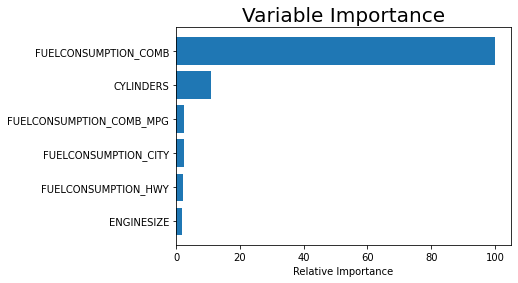

In [40]:
# Feature Importance
feature_importance = model.feature_importances_

# make importance relative to max importance
feature_importance = (feature_importance/feature_importance.max()*100)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance', size=20)
plt.show()

[0.01602156 0.09219316 0.02004856 0.01793669 0.83267068 0.02112935]


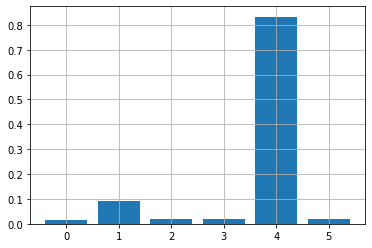

In [45]:
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_) # x = range(len(model.feature_importances_), 
plt.grid()                                                                  # y = model.feature_importances_